# Homework 0

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import *
plt.style.use('ggplot')

## First derivative

First derivative can be computed as 
$$ u'(x_i) \approx \frac{U_{i+1} - U_{i-1}}{2h},$$ 
which gives us second order of approximation (due symmetry):
$$u'(x_i) = \frac{U_{i+1} - U_{i-1}}{2h} + O(h^2). $$
For non-evenly spaced points:
$$ u'(x_i) \approx \frac{U_{i+1} - U_{i-1}}{x_{i+1}-x_{i-1}}.$$ 

Then our matrix $D$ in inner points will look as:

In [2]:
def diffmat(x):
    n = len(x)             # number of points
    n_in = n-2            # number of inner points
    dx = x[1:] - x[:-1]    # h for each cell ((n-1) cells)
    dx2 = dx[:-1] + dx[1]  # h_{i-1} + h_{i+1}
    D = np.diag(-np.ones(n_in-1)/dx2[1:], -1) + np.diag(np.ones(n_in-1)/dx2[:-1], 1)
    return D

x = np.linspace(-1,1,5)
diffmat(x)

array([[ 0.,  1.,  0.],
       [-1.,  0.,  1.],
       [ 0., -1.,  0.]])

As test we can use $u(x) = \sin(x)$:

<IPython.core.display.Javascript object>


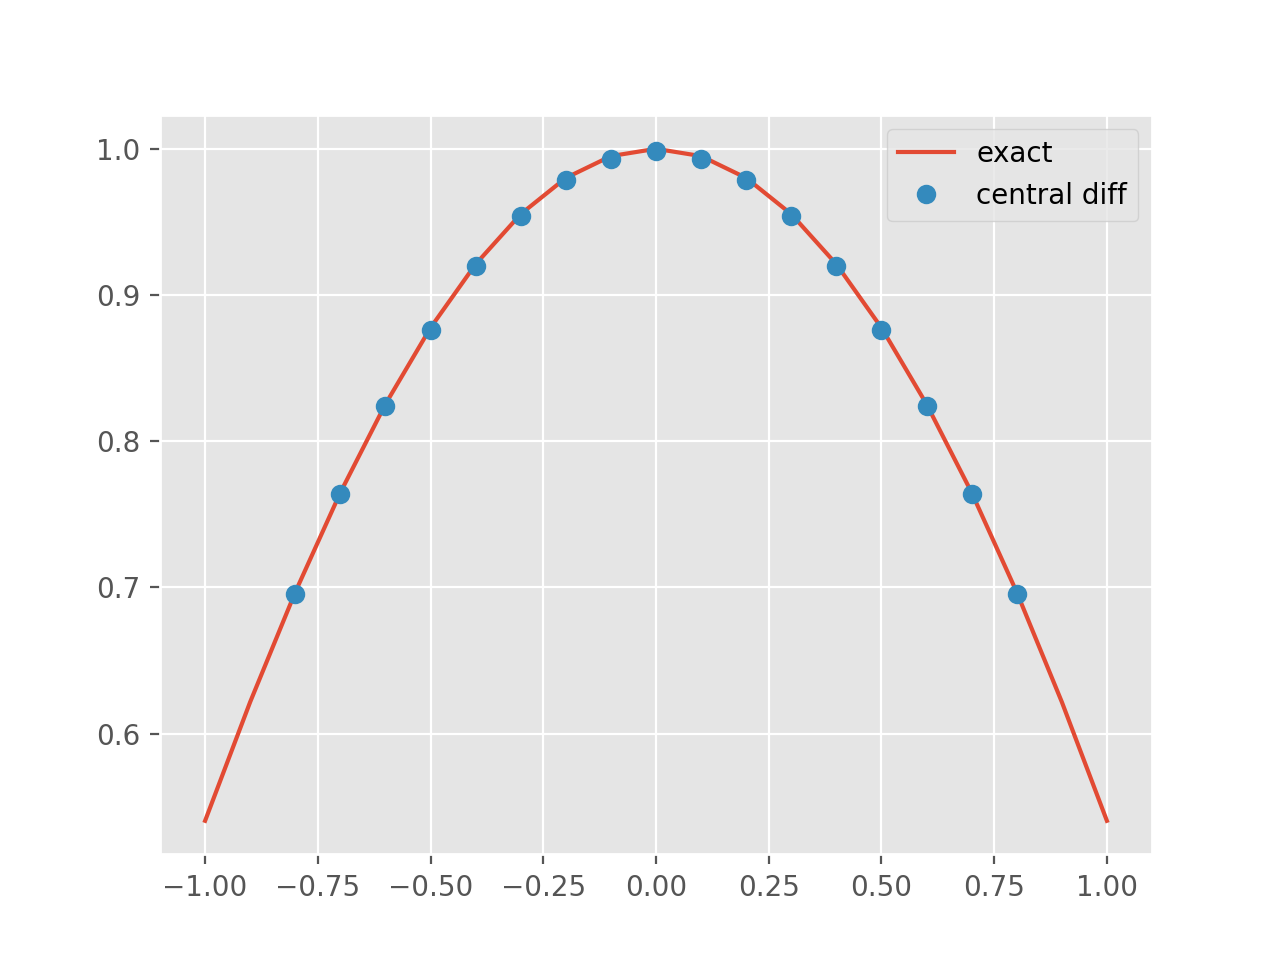

In [3]:
x = np.linspace(-1, 1, 21)
u = np.sin(x)
du_exact = np.cos(x)
plt.figure()
plt.plot(x, du_exact, label='exact')
plt.plot(x[2:-2], diffmat(x).dot(u[1:-1])[1:-1], 'o', label='central diff')
plt.legend(loc=0)

The global error is $E = \|U^{(h)} - [u]_h\|$, where $U^{(h)}$ is numerical solution on grid with cells $h$ and $[u]_h$ is exact solution in grid points. The error can be calculated in $L_2$ norm. The slope in loglog plot is equal -2, so, which prove, that we have error $O(h^2)$ and approximate first derivative with second order.

<IPython.core.display.Javascript object>


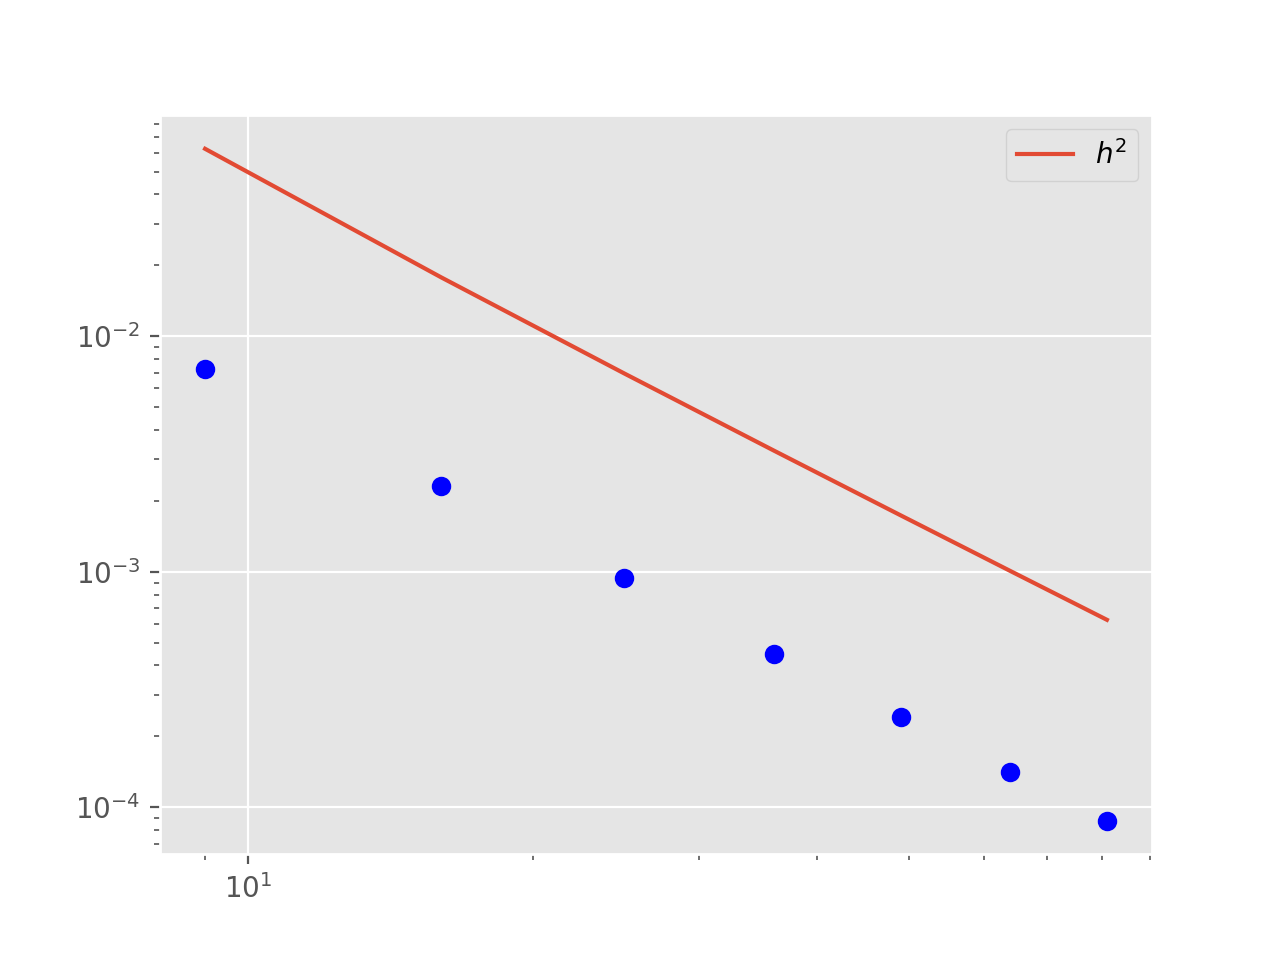

In [5]:
N = [i**2 for i in range(3,10)]
h = [2/(n-1) for n in N]
plt.figure()
for n in N:
    x = np.linspace(-1, 1, n)
    u = np.sin(x)
    du_exact = np.cos(x)
    Error = np.linalg.norm(du_exact[2:-2] - diffmat(x).dot(u[1:-1])[1:-1])/np.sqrt(n)
    plt.loglog(n, Error, 'bo')
plt.loglog(N, np.power(h,2), label='$h^2$')
plt.legend(loc=0)


We can add first order opproximation at boundary points or second order non-symmetric approximation

In [12]:
x = np.linspace(-1, 1, 5)
def diffmat(x):
    n = len(x)             # number of points
    dx = x[1:] - x[:-1]    # h for each cell ((n-1) cells)
    dx2 = dx[:-1] + dx[1]  # h_{i-1} + h_{i+1}
    lower = np.append(-np.ones(n-2)/dx2, 0)
    upper = np.append(0, np.ones(n-2)/dx2)
    D = np.diag(lower,-1) + np.diag(upper, 1)
    D[0,0] = -1/dx[0]   # BC 
    D[0,1] = 1/dx[0]
    D[-1,-1] = 1/dx[-1] # BC   
    D[-1,-2] = -1/dx[-1]
    return D
diffmat(x)

array([[-2.,  2.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -2.,  2.]])

<IPython.core.display.Javascript object>


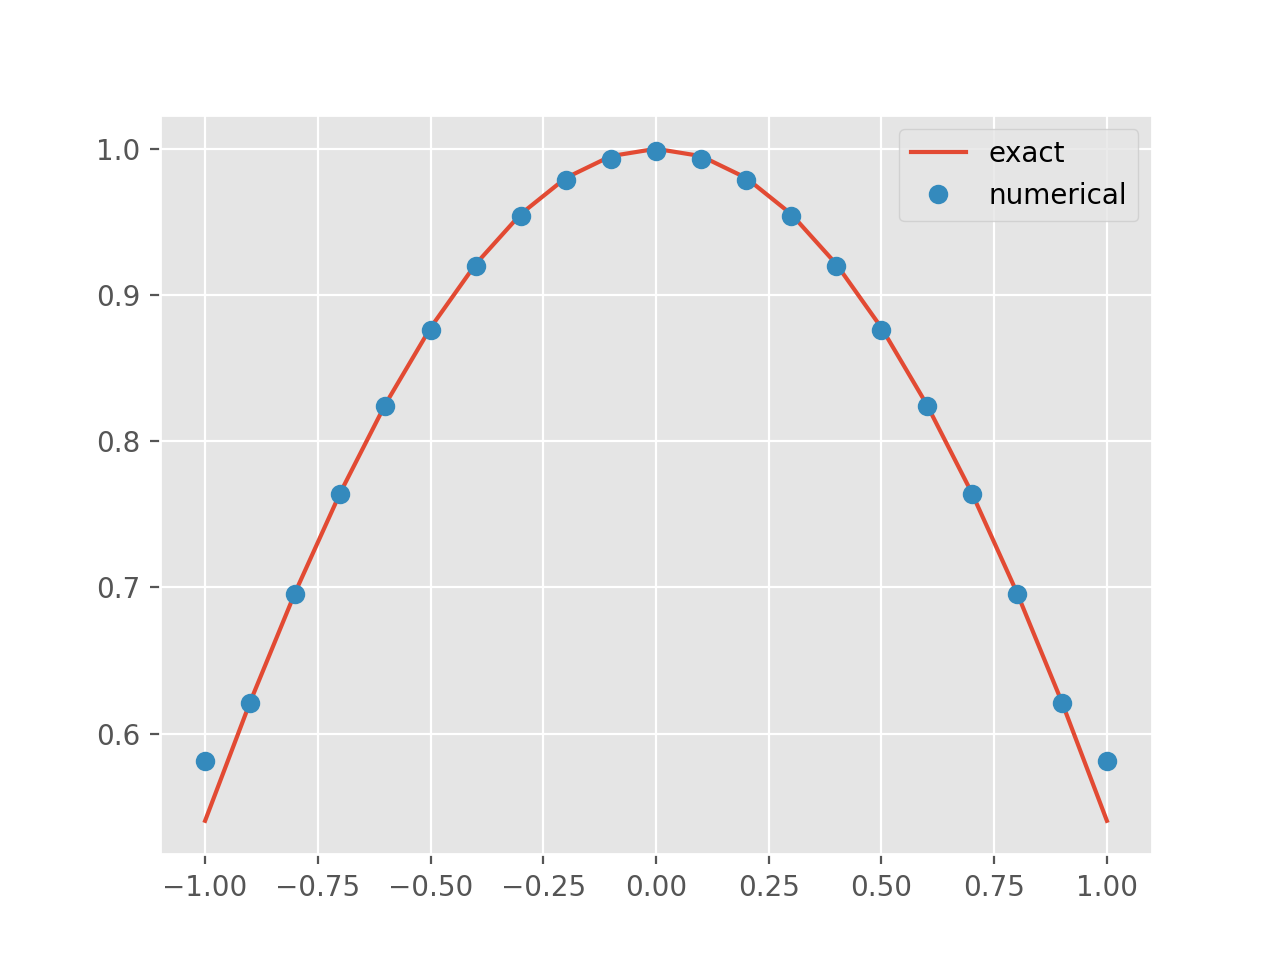

In [14]:
x = np.linspace(-1, 1, 21)
u = np.sin(x)
du_exact = np.cos(x)
plt.figure()
plt.plot(x, du_exact, label='exact')
plt.plot(x, diffmat(x).dot(u), 'o', label='numerical')
plt.legend(loc=0)

<IPython.core.display.Javascript object>


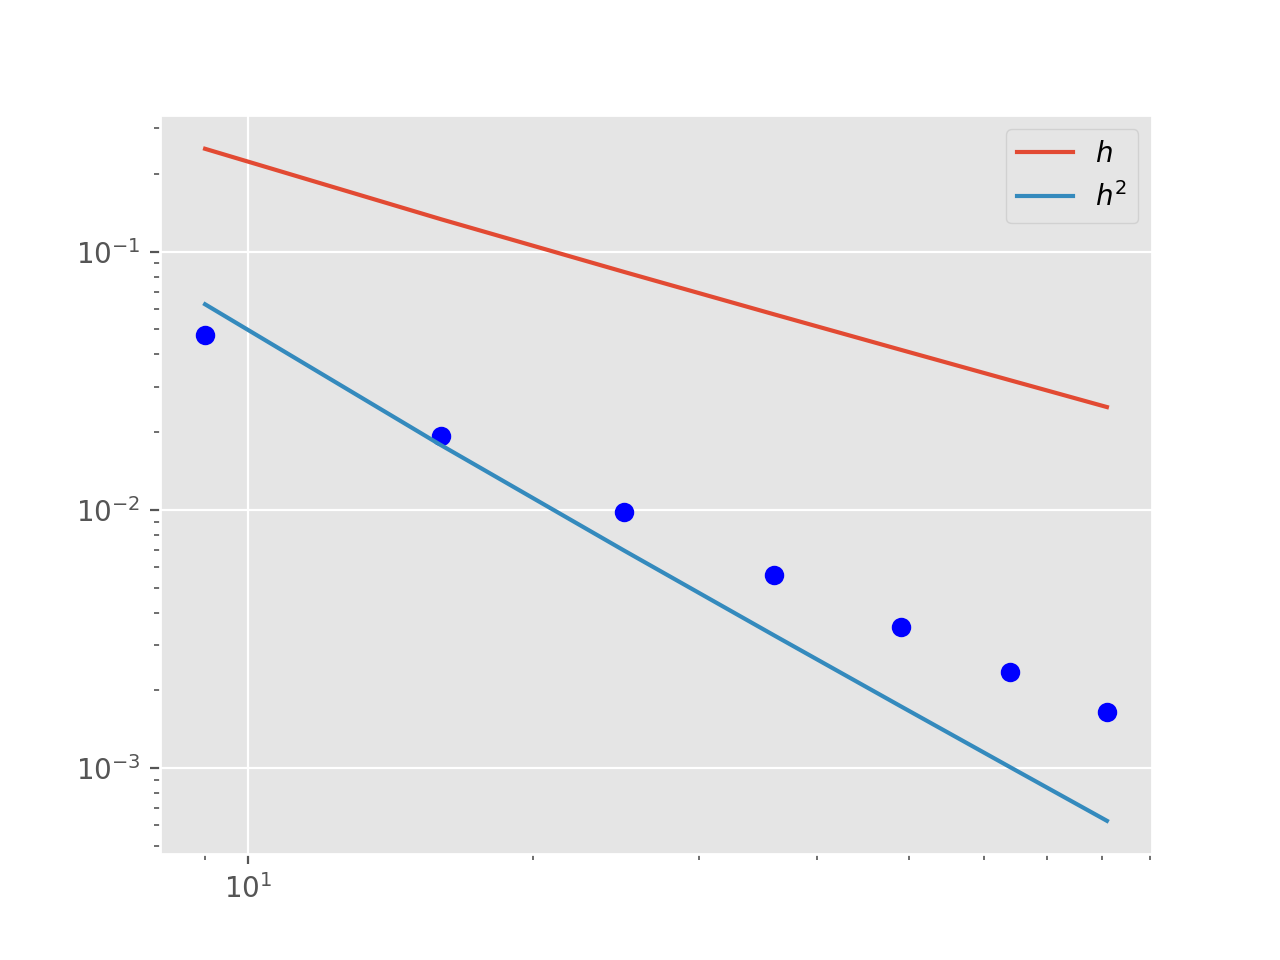

In [18]:
N = [i**2 for i in range(3,10)]
h = [2/(n-1) for n in N]
plt.figure()
for n in N:
    x = np.linspace(-1, 1, n)
    u = np.sin(x)
    du_exact = np.cos(x)
    Error = np.linalg.norm(du_exact - diffmat(x).dot(u))/np.sqrt(n)
    plt.loglog(n, Error, 'bo')
plt.loglog(N, np.power(h,1), label='$h$')
plt.loglog(N, np.power(h,2), label='$h^2$')
plt.legend(loc=0)

## Second derivative

Second derivative can be approximated as
$$ u'(x_i) \approx \frac{U_{i+1} -2U_i + U_{i-1}}{h^2},$$ 
which gives us second order of approximation:
$$u'(x_i) = \frac{U_{i+1} -2U_i + U_{i-1}}{h^2} + O(h^2). $$

Then our matrix $D_2$ in inner points will look as:

In [10]:
def diff2mat(x):
    n = len(x)             # number of points
    n_in = n-2             # number of inner points
    h = (x[-1] - x[0])/(n-1)
    dx = x[1:] - x[:-1]    # h for each cell ((n-1) cells)
    dx2 = ((dx[:-1] + dx[1])/2)**2  # (h_{i-1} + h_{i+1})/2
    lower = np.ones(n_in-1)/dx2[1:]
    upper = np.ones(n_in-1)/dx2[:-1]
    D = (np.diag(lower, -1) -2*np.diag(np.ones(n_in), 0)/dx2 + np.diag(upper, 1))
    return D
x = np.linspace(-1,1,5)
diff2mat(x)

array([[-8.,  4.,  0.],
       [ 4., -8.,  4.],
       [ 0.,  4., -8.]])

As test we can use $u(x) = \sin(x)$:

<IPython.core.display.Javascript object>


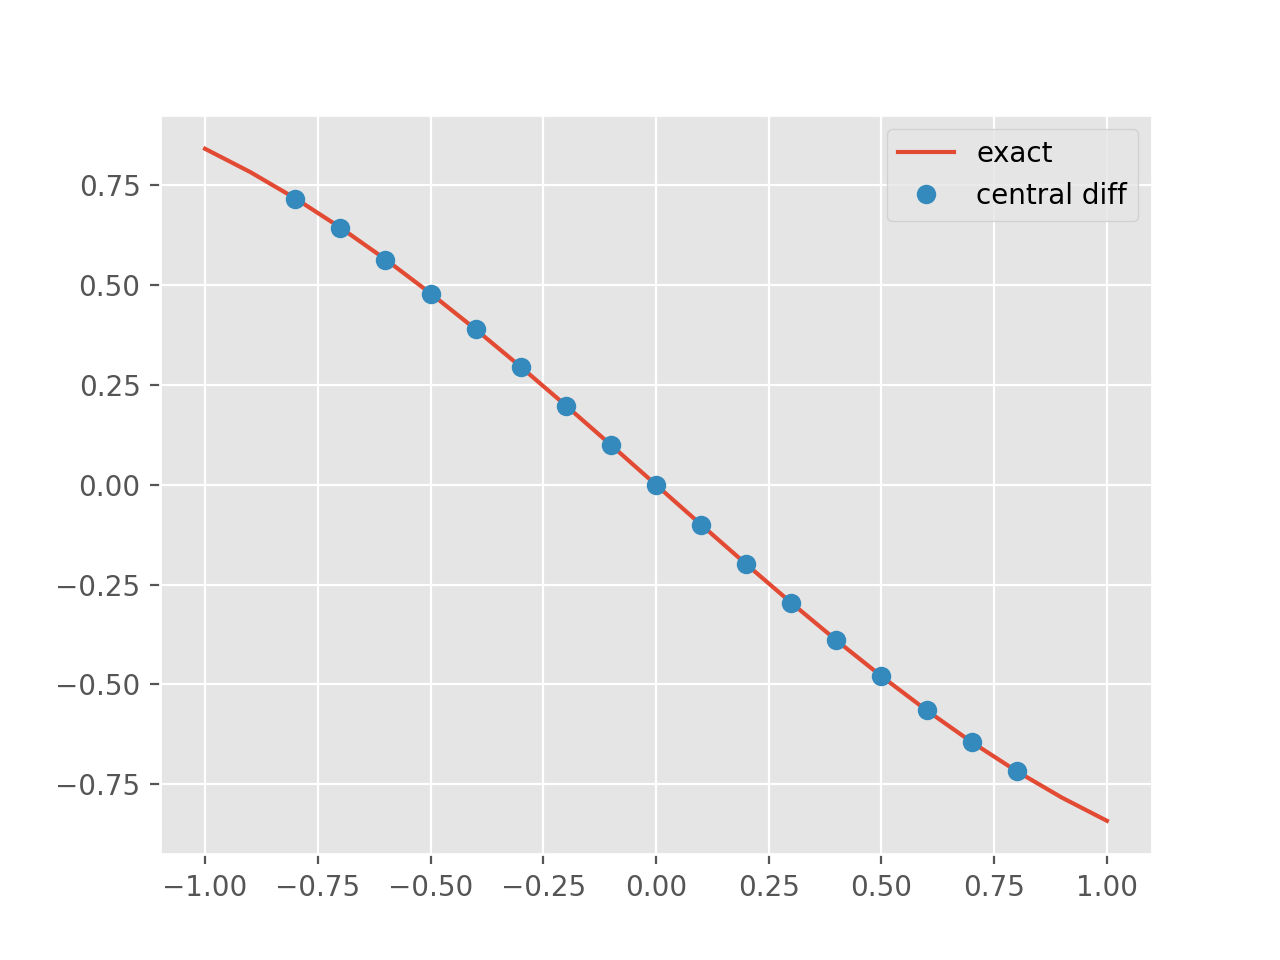

In [19]:
x = np.linspace(-1, 1, 21)
u = np.sin(x)
ddu_exact = -np.sin(x)
plt.figure()
plt.plot(x, ddu_exact, label='exact')
plt.plot(x[2:-2], diff2mat(x).dot(u[1:-1])[1:-1], 'o', label='central diff')
plt.legend(loc=0)

The global error is $E = U^{(h)} - [u]_h$, where $U^{(h)}$ is numerical solution on grid with cells $h$ and $[u]_h$ is exact solution in grid points.The global error is $E = U^{(h)} - [u]_h$, where $U^{(h)}$ is numerical solution on grid with cells $h$ and $[u]_h$ is exact solution in grid points. The error can be calculated in $L_2$ norm. The slope in loglog plot is equal -2, so, which prove, that we have error $O(h^2)$ and approximate first derivative with second order.

<IPython.core.display.Javascript object>


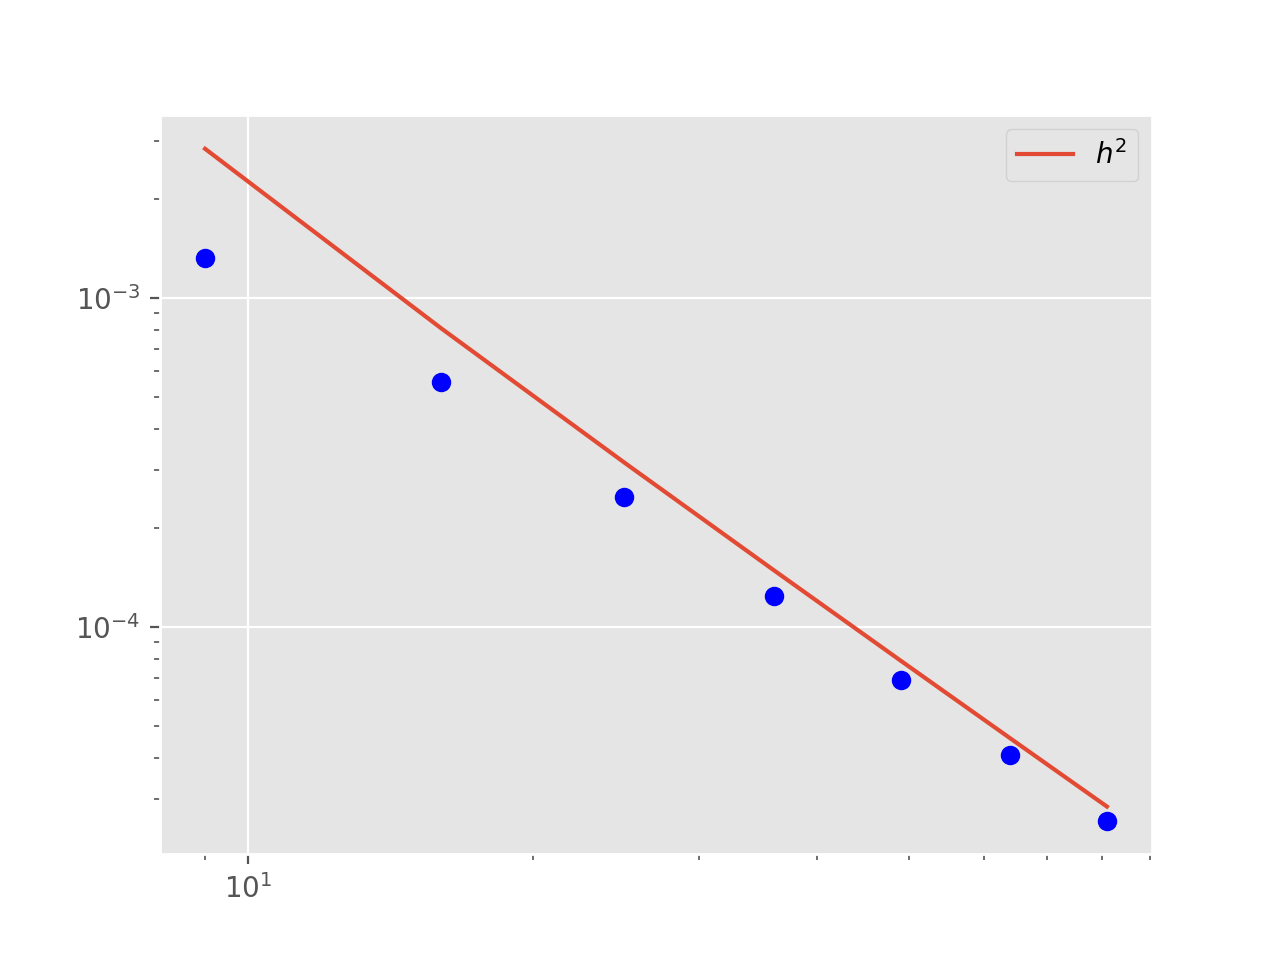

In [27]:
N = [i**2 for i in range(3,10)]
h = [2/(n-1) for n in N]
plt.figure()
for n in N:
    x = np.linspace(-1, 1, n)
    u = np.sin(x)
    ddu_exact = -np.sin(x)
    Error = np.linalg.norm(ddu_exact[2:-2] - diff2mat(x).dot(u[1:-1])[1:-1])/np.sqrt(n)
    plt.loglog(n, Error, 'bo')
plt.loglog(N, np.power(h,2)/22, label='$h^2$')
plt.legend(loc=0)

If we have BVP, we can define approximation for boundary points too. 
$$\frac{d^2u}{dx^2} = -sin(x);$$
$$u(-\pi) = 0;$$
$$\frac{du}{dx}(\pi) = -1.$$
We have Dirichlet BC on left boundary and Neumann BC on right boundary.
The Dirichlet BC gives us exact value $U_0 = 0$.
For Neumann BC we can solve 2 equations:
$$\frac{U_{N+1}-U_{N-1}}{2h} = -1.$$
$$\frac{U_{N+1} -2U_N + U_{N-1}}{h^2} = f(x_N)$$
Solving this 2 equations together we get
$$ \frac{U_{N}-U_{N-1}}{h} = f(x_N)/2 - 1 $$
So we can add rows to our matrix.

In [30]:
def diff2mat(x):
    n = len(x)             # number of points
    h = (x[-1] - x[0])/(n-1)
    dx = x[1:] - x[:-1]    # h for each cell ((n-1) cells)
    dx2 = ((dx[:-1] + dx[1])/2)**2  # (h_{i-1} + h_{i+1})/2
    lower = np.append(np.ones(n-2)/dx2, 0)
    upper = np.append(0, np.ones(n-2)/dx2)
    diag = np.append(np.append(0, -2*np.ones(n-2)/dx2),0)
    D = (np.diag(lower, -1) + np.diag(diag,0) + np.diag(upper, 1))
    # Dirichlet condition
    D[0,0] = 1
    # Neumann condition
    D[-1,-1] = 1/dx[-1]
    D[-1,-2] =-1/dx[-1]
    return D
x = np.linspace(-1,1,5)
diff2mat(x)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 4., -8.,  4.,  0.,  0.],
       [ 0.,  4., -8.,  4.,  0.],
       [ 0.,  0.,  4., -8.,  4.],
       [ 0.,  0.,  0., -2.,  2.]])

<IPython.core.display.Javascript object>


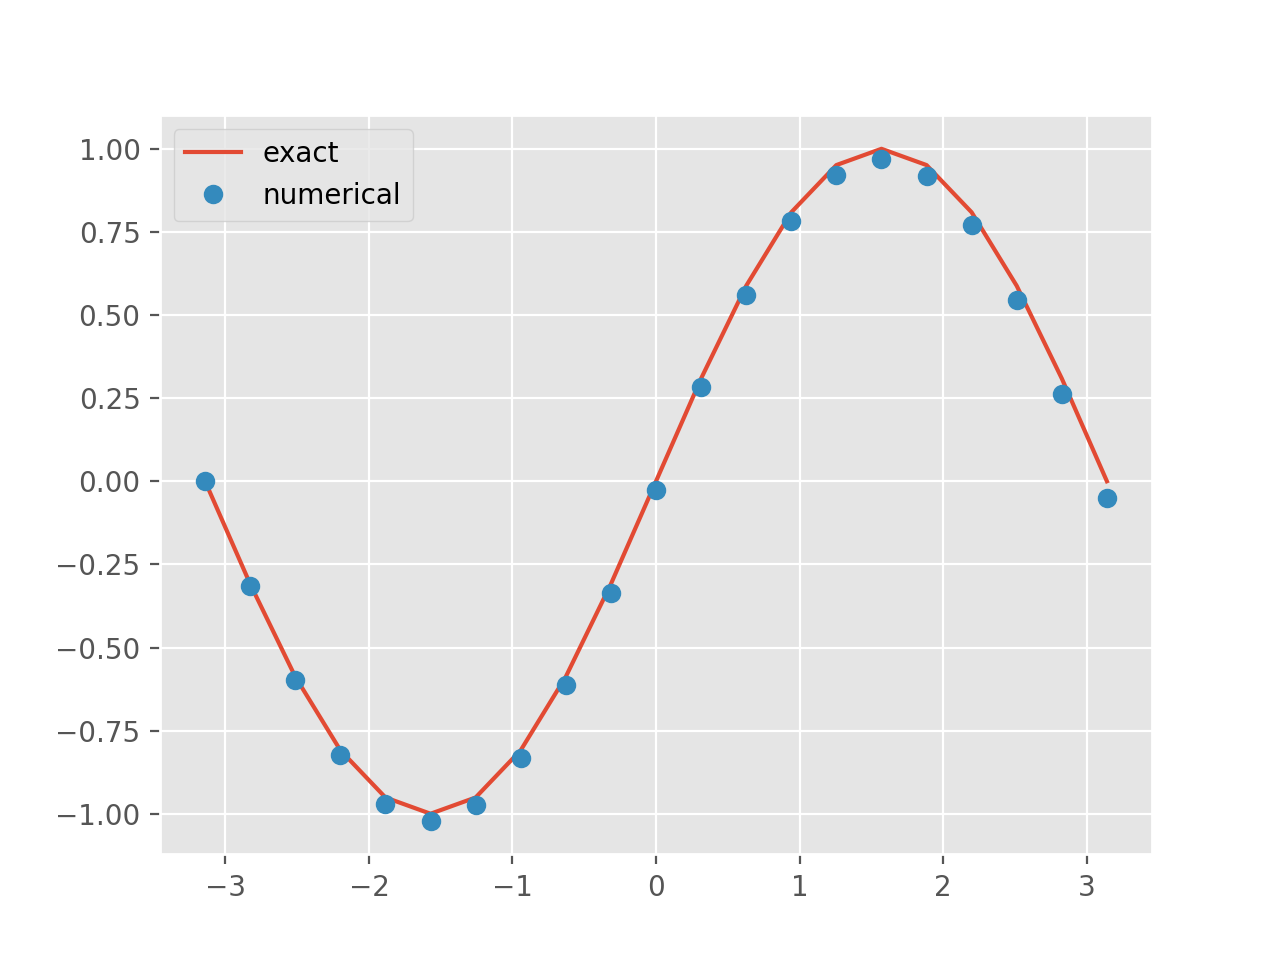

In [31]:
x = np.linspace(-pi, pi, 21)
u_exact = np.sin(x)
f = -np.sin(x)
f[0] = 0
f[-1] = 0 - 1
u = np.linalg.solve(diff2mat(x), f)
plt.figure()
plt.plot(x, u_exact, label='exact')
plt.plot(x, u, 'o', label='numerical')
plt.legend(loc=0)

<IPython.core.display.Javascript object>


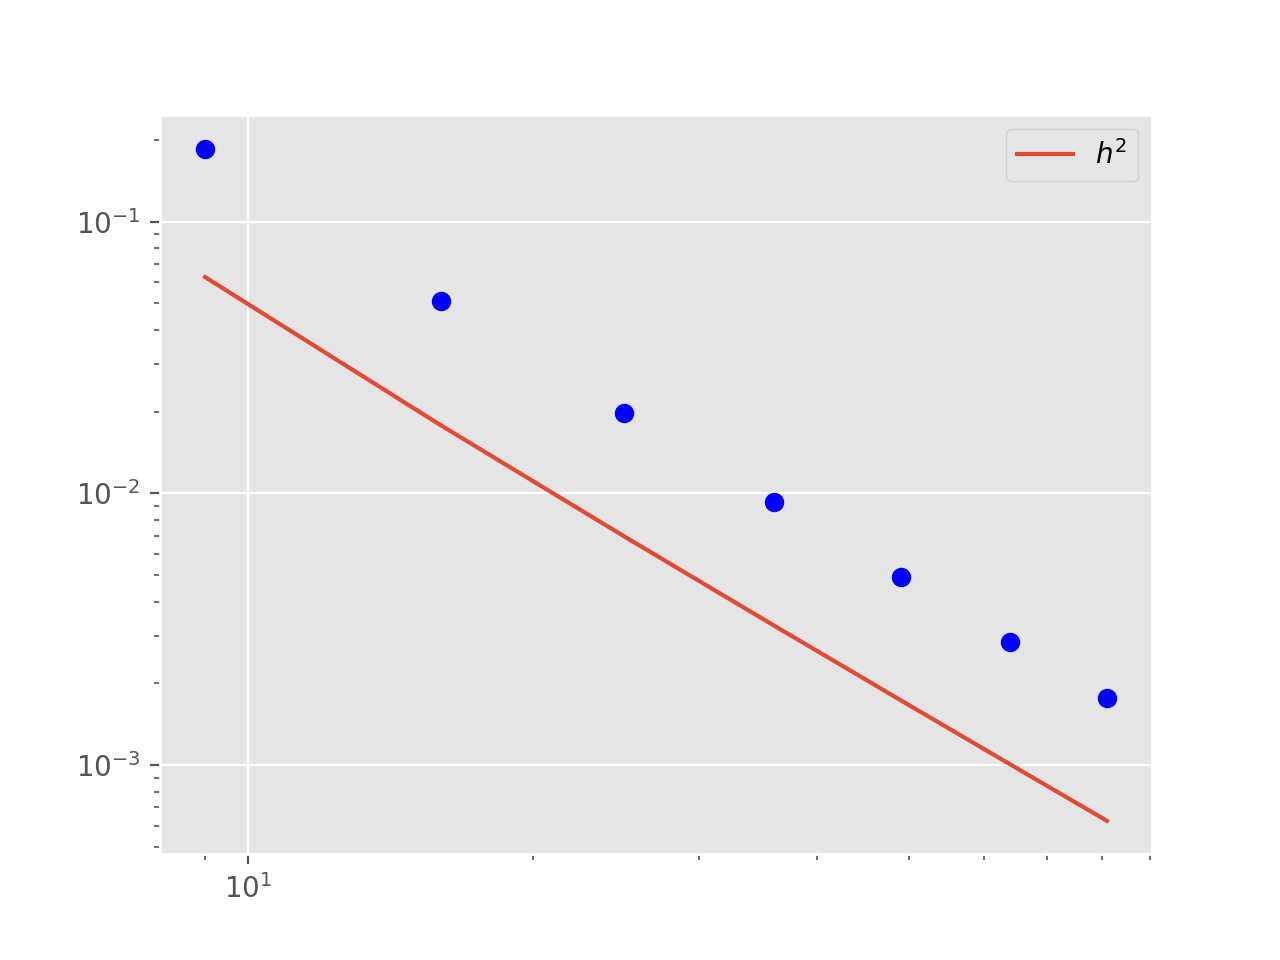

In [36]:
N = [i**2 for i in range(3,10)]
h = [2/(n-1) for n in N]
plt.figure()
for n in N:
    x = np.linspace(-pi, pi, n)
    u_exact = np.sin(x)
    f = -np.sin(x)
    f[0] = 0
    f[-1] = 0 - 1
    u = np.linalg.solve(diff2mat(x), f)
    Error = np.linalg.norm(u_exact - u)/np.sqrt(n)
    plt.loglog(n, Error, 'bo')
plt.loglog(N, np.power(h,2), label='$h^2$')
plt.legend(loc=0)